In [1]:
#Import Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd




In [2]:
# Get_page_reviews function scrapes all reviews, titles, and scores
# and returns a data frame containing the results across 3 columns

def get_page_reviews(soup, start_id):
    # Initialise dataframe
    review_df = pd.DataFrame(columns = ["review_id", "title","review","score"])
    
    # Return all review sections
    reviews = soup.find_all("div", {"class": "mb-0_wJE overflow-hidden_1pr card_12c card-full_1bA card-full-md_1Kd"})
    
    review_id = start_id + 1
    
    # Scrape relevant data for each review
    for review in reviews:
        score = review.find_all("div", {"class":  re.compile('me-1_2lk flex-shrink-0_2yX.*')})
        score = re.search('title="(\d)\sout\sof',str(score)).group(1)

        title = review.find_all("h3", {"class":  "mb-1_2Ff"})
        title = re.search('>(.+?)<',str(title)).group(1)

        reviews = review.find_all("div", {"class":  "relative_1Fn text-break_iZk"})
        for review_segment in reviews:
            review_start = review_segment.find('p')
            review_end = review_segment.find("span", {"class":  "d-none_21M"})

            if review_end is not None:
                review_complete = re.sub("\.\.\.$", "", review_start.text) + re.sub("^\.\.\.", "", review_end.text)
            else:
                review_complete = review_start.text

            review_df = review_df.append(pd.DataFrame([[review_id, title, review_complete, score]], columns = ["review_id", "title","review","score"]))
            review_id += 1
    return review_df, review_id

    

In [3]:
# Create empty dataframe for vodafone reviews
vodafone_reviews = pd.DataFrame(columns = ["review_id", "title","review","score"])

#vodafone_reviews = pd.read_csv('vodafone_reviews.csv')  

In [4]:
from os import listdir
from os.path import isfile, join

data_path = 'C:\\Users\\matth\\Documents\\Uni Work\\Data Science Project 1\\VF Reviews'

file_list = [f for f in listdir(data_path) if isfile(join(data_path, f))]

#print(file_list)

In [5]:


# loop through all vodafone review pages, and add reviews to vodafone_review dataframe

for file in file_list:
    
    # Set review id to 0
    review_id = 0
    
    # load  and parse the next page of reviews
    try:
        cur_file = open(data_path + "\\" + file)
        print(data_path + "\\" + file)
        page = cur_file.read()
        cur_file.close()

        # print(page)
        soup = BeautifulSoup(page, 'html.parser')

        # get reviews on current page
        cur_reviews , review_id = get_page_reviews(soup, review_id)
        

        # Append reviews for current page
        vodafone_reviews = vodafone_reviews.append(cur_reviews)
    except:
        print("an error occured with file: " + data_path + "\\" + file)



C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 10) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 100) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 101) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 102) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 103) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 104) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 105) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 106) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodaf

C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 16) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 17) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 18) _ ProductReview.com.au.html
an error occured with file: C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 18) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 19) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 2) _ ProductReview.com.au.html
an error occured with file: C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 2) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 20) _ ProductReview.com.au.html
C:\Users\matth\Documents\U

C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 66) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 67) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 68) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 69) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 7) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 70) _ ProductReview.com.au.html
an error occured with file: C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 70) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Project 1\VF Reviews\Vodafone (page 71) _ ProductReview.com.au.html
C:\Users\matth\Documents\Uni Work\Data Science Projec

In [6]:
print(len(vodafone_reviews))

1903


In [7]:
vodafone_reviews

,review_id,title,review,score
0,1,Vodaphone Almost Ruined My Life - Stolen Ident...,My email and password were part of a company d...,1
0,2,Misguided Sale,"Misguided SaleCouple of days ago, I was told t...",1
0,3,Worst network,Worst network for data in Australia. I used Vo...,1
0,4,Insurance contract with them is bulshit,They charged me for over a year a plan with in...,1
0,5,RECORD all your phonecalls with them when you ...,My parents and I have been with Vodafone for a...,1
...,...,...,...,...
0,11,Below average,"Vodafone's extremely cheap, now I know why. Te...",2
0,12,Poor customer service and tend to charge more ...,I reduced my plan to$22 from $35 thinking it w...,1
0,13,INSENSITIVE TO THE CUSTOMER SUFFERINGS,Please never ever make mistake of going with V...,1
0,14,Extremely Terrible Customer Service at Westfie...,I had to get my address changed (same as on my...,1


In [8]:
vodafone_reviews.to_csv ('vodafone_reviews.csv', index = None, header=True)

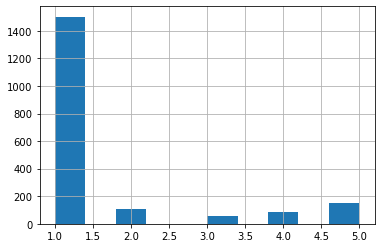

In [13]:
##########################################
##  Some EDA

vodafone_reviews['score'] = pd.to_numeric(vodafone_reviews['score'])

vodafone_reviews['score'].hist();

In [10]:
### Set all text to lower case

vodafone_reviews['review'] = vodafone_reviews['review'].str.lower()
vodafone_reviews['title'] = vodafone_reviews['title'].str.lower()


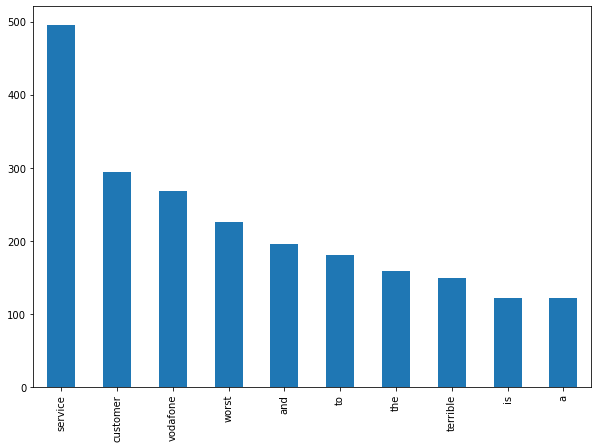

In [17]:
def strip_punct(word):
    word =  re.sub("[,\.;:\(\)\{\}\[\]!?\"\s\n]+", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        words = strip_punct(df[column].iloc[i])
        words = words.split(" ")
        word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame




word_frame = list_of_words(vodafone_reviews, "title")

word_frame.words[word_frame.words != ""].value_counts().head(10).plot(kind='bar',figsize=(10,7));


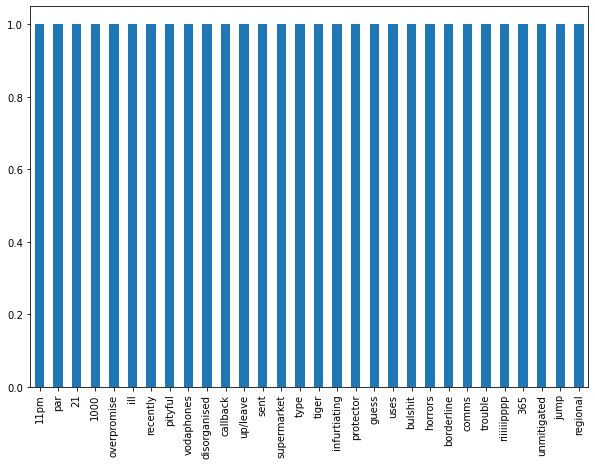

In [19]:
word_frame.words[word_frame.words != ""].value_counts().tail(30).plot(kind='bar',figsize=(10,7));

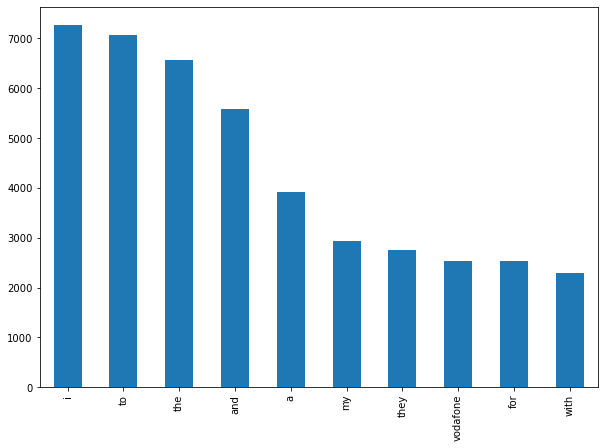

In [20]:
word_frame = list_of_words(vodafone_reviews, "review")

word_frame.words[word_frame.words != ""].value_counts().head(10).plot(kind='bar',figsize=(10,7));

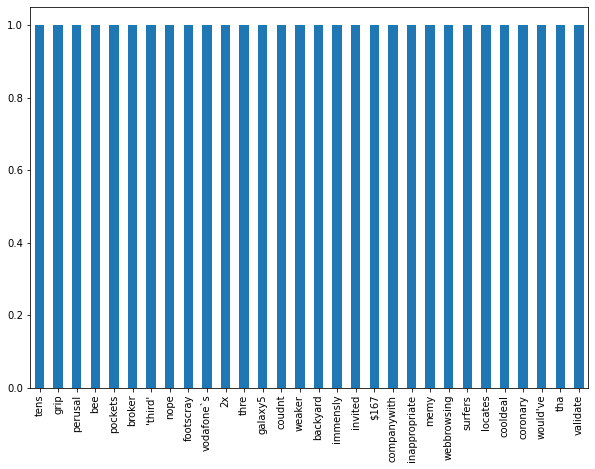

In [21]:
word_frame.words[word_frame.words != ""].value_counts().tail(30).plot(kind='bar',figsize=(10,7));